In [60]:
import torch 
import torch.nn as nn
from torch.optim import SGD
import torch.nn.functional as F 
from torch.utils.data import Dataset, DataLoader
import torchvision
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [61]:
x, y = torch.load("/Users/ahmedalmaqbali/Desktop/Muaeen/Rihal/intern/repo/pytorch_/data/MNIST/processed/training.pt")

In [62]:
x

tensor([[[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        ...,

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0,

In [63]:
x.shape

torch.Size([60000, 28, 28])

In [64]:
y

tensor([5, 0, 4,  ..., 5, 6, 8])

In [65]:
y.shape

torch.Size([60000])

In [66]:
y[0]

tensor(5)

In [67]:
x[0]

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,
          18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   

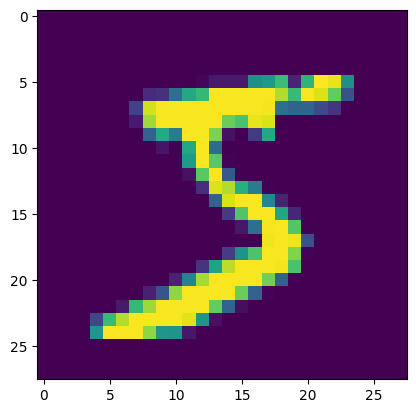

In [68]:
plt.imshow(x[0])

In [69]:
y_original = torch.tensor([2,4,7,8,2])
y_new =F.one_hot(y_original)

In [70]:
y_original

tensor([2, 4, 7, 8, 2])

In [71]:
y_new

tensor([[0, 0, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 1],
        [0, 0, 1, 0, 0, 0, 0, 0, 0]])

In [72]:
torch.unique(y)

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [73]:
print(f"first number is {torch.min(y)}")
print(f"the last number is {torch.max(y)}")

first number is 0
the last number is 9


In [74]:
y_new = F.one_hot(y, num_classes=10)
y_new.shape

torch.Size([60000, 10])

In [75]:
y_new

tensor([[0, 0, 0,  ..., 0, 0, 0],
        [1, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 1, 0]])

In [76]:
x.shape

torch.Size([60000, 28, 28])

In [77]:
x.view(-1, 28**2).shape

torch.Size([60000, 784])

In [78]:
class CTDataset(Dataset):
    def __init__(self, filepath):
        # Load data from the given filepath
        self.x, self.y = torch.load(filepath)
        # Normalize the images by dividing by 255
        self.x = self.x / 255.  
        # One-hot encode the labels and convert to float type
        self.y = F.one_hot(self.y, num_classes=10).to(float)  

    def __len__(self):
        # Return the number of items in the dataset
        return self.x.shape[0]  

    def __getitem__(self, ix):
        # Return the pair (image, label) at index ix
        return self.x[ix], self.y[ix]


In [79]:
train_ds = CTDataset("/Users/ahmedalmaqbali/Desktop/Muaeen/Rihal/intern/repo/pytorch_/data/MNIST/processed/training.pt")
test_ds = CTDataset("/Users/ahmedalmaqbali/Desktop/Muaeen/Rihal/intern/repo/pytorch_/data/MNIST/processed/test.pt")

In [80]:
train_ds[0]

(tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000,

In [81]:
test_ds[0]

(tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000,

In [82]:
xs, ys = train_ds[0:4]

In [83]:
xs

tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 

In [84]:
ys

tensor([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=torch.float64)

In [85]:
# Create a DataLoader for the training dataset 'train_ds' with a batch size of 5.
train_d1 = DataLoader(train_ds, batch_size=5)

In [86]:
train_d1

In [87]:
L = nn.CrossEntropyLoss() # lost function

In [88]:
# convluation nural network
# conf2d 
# there is spicific func for images
# try to use different artic
# self supervi to lable the img
# tools : depending on the task 
# one of tools : (label studio)

In [89]:
class MyNeuralNet(nn.Module):
    def __init__(self):
        super().__init__()  # Initialize the parent class, nn.Module
        # Define the first linear transformation layer: input features 784 (28x28), output features 100
        self.Matrix1 = nn.Linear(28**2, 100)
        # Define the second linear transformation layer: input features 100, output features 50
        self.Matrix2 = nn.Linear(100, 50)
        # Define the third linear transformation layer: input features 50, output features 10
        self.Matrix3 = nn.Linear(50, 10)
        # Define a ReLU activation function to be used after linear transformations
        self.R = nn.ReLU()

    def forward(self, x):
        # Flatten the input tensor to shape [batch_size, 784]
        x = x.view(-1, 28**2)
        # Apply the first matrix transformation followed by ReLU activation
        x = self.R(self.Matrix1(x))
        # Apply the second matrix transformation followed by ReLU activation
        x = self.R(self.Matrix2(x))
        # Apply the third matrix transformation
        x = self.Matrix3(x)
        # Return the output tensor, potentially removing extraneous dimensions (if any)
        return x.squeeze()


In [90]:
f = MyNeuralNet()

In [91]:
xs.shape

torch.Size([4, 28, 28])

In [92]:
f(xs)[0]

tensor([-0.0656,  0.0229, -0.0446,  0.0701,  0.0165, -0.1943,  0.1233,  0.0067,
        -0.1340, -0.0184], grad_fn=<SelectBackward0>)

In [93]:
ys[0]

tensor([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=torch.float64)

In [94]:
L(f(xs), ys)

tensor(2.3483, dtype=torch.float64, grad_fn=<DivBackward1>)

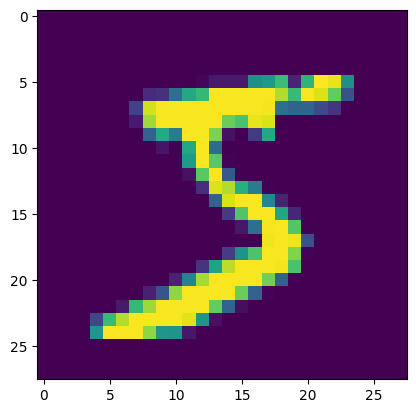

In [95]:
plt.imshow(xs[0])

In [96]:
# Function to train a neural network model
# d1: DataLoader for the training data
# f: The neural network model to be trained
# n_epochs: The number of epochs to train the model, default is 20
def train_model(d1, f, n_epochs=20):
    # Initialize the optimizer with the model parameters and a learning rate of 0.01
    opt = SGD(f.parameters(), lr=0.01)  # SGD is stochastic gradient descent
    # Initialize the loss function as Cross Entropy Loss
    L = nn.CrossEntropyLoss()  # This is the loss function

    # Lists to store loss values and epoch numbers for plotting or analysis
    losses = []
    epochs = []
    for epoch in range(n_epochs):  # Loop over each epoch
        print(f"Epoch {epoch}")  # Print the current epoch number
        N = len(d1)  # Total number of batches in the DataLoader
        for i, (x, y) in enumerate(d1):  # Loop over each batch in the DataLoader
            # Reset gradients for the current batch
            opt.zero_grad()
            # Compute the model's output and calculate the loss
            loss_value = L(f(x), y)
            # Backpropagate the loss
            loss_value.backward()
            # Update the model parameters
            opt.step()

            # Store the loss value and the effective epoch number for this batch
            # Effective epoch is a fraction considering the progress within the epoch
            epochs.append(epoch + i / N)
            losses.append(loss_value.item())
            
    # Convert lists to numpy arrays for easier handling
    return np.array(epochs), np.array(losses)


In [97]:
epoch_data, loss_data = train_model(train_d1, f)

Epoch 0
Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 6
Epoch 7
Epoch 8
Epoch 9
Epoch 10
Epoch 11
Epoch 12
Epoch 13
Epoch 14
Epoch 15
Epoch 16
Epoch 17
Epoch 18
Epoch 19


Text(0.5, 1.0, 'Cross Entropy (per batch)')

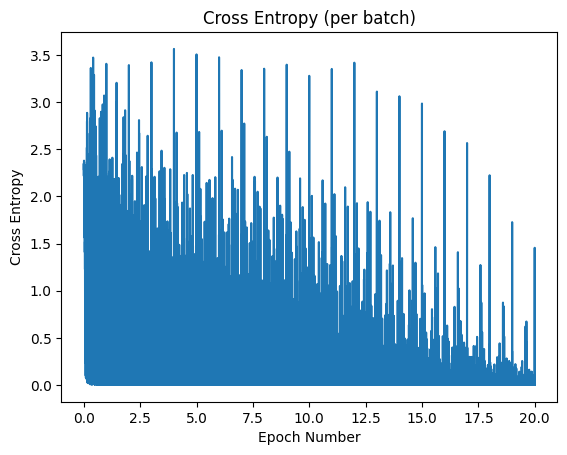

In [98]:
plt.plot(epoch_data, loss_data)
plt.xlabel('Epoch Number')
plt.ylabel('Cross Entropy')
plt.title('Cross Entropy (per batch)')

In [99]:
loss_data.shape

(240000,)

In [100]:
loss_data.reshape(20, -1).shape

(20, 12000)

In [101]:
epoch_data_avgd = epoch_data.reshape(20, -1).mean(axis=1)
loss_data_avgd = loss_data.reshape(20, -1).mean(axis=1)


Text(0.5, 1.0, 'Cross Entropy (per batch)')

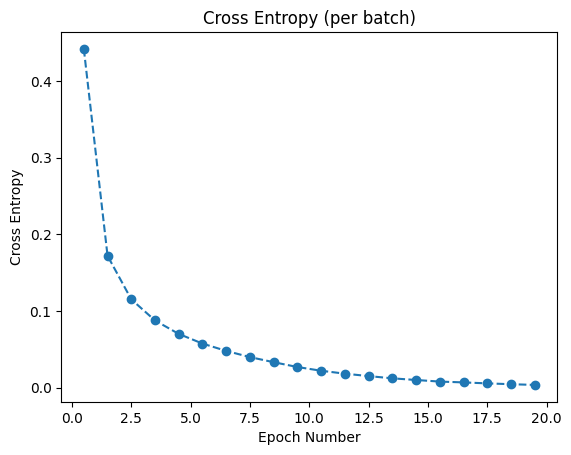

In [102]:
plt.plot(epoch_data_avgd, loss_data_avgd, '--o')
plt.xlabel('Epoch Number')
plt.ylabel('Cross Entropy')
plt.title('Cross Entropy (per batch)')

In [103]:
train_ds[0][1]

tensor([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=torch.float64)

In [104]:
y_simple = train_ds[0][1]
y_simple

tensor([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=torch.float64)

In [105]:
train_ds[0][0]

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000

In [106]:
x_simple = train_ds[0][0]
yhat_simple = f(x_simple)
yhat_simple

tensor([ -4.3644, -10.4943,   4.6424,  24.5850, -29.0053,  32.5827, -12.1223,
         -8.4413,   1.1240,   3.6089], grad_fn=<SqueezeBackward0>)

In [107]:
torch.argmax(yhat_simple)

tensor(5)

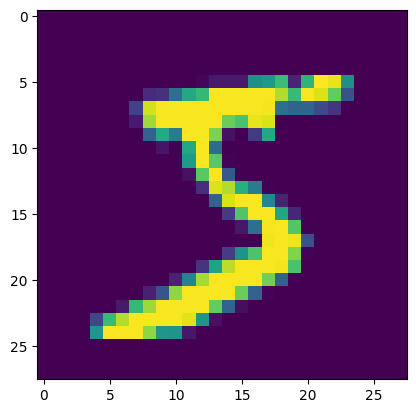

In [108]:
plt.imshow(x_simple)

In [109]:
test_ds[20][1]

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=torch.float64)

In [110]:
y_simple = test_ds[20][1]
y_simple

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=torch.float64)

In [111]:
train_ds[20][0]

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000

In [112]:
x_simple = test_ds[20][0]
yhat_simple = f(x_simple)
yhat_simple

tensor([ -6.4045,   1.1863,  -6.2639,   2.0876,   7.2952,  -2.7142, -22.9068,
          8.0926,   0.2849,  19.5876], grad_fn=<SqueezeBackward0>)

In [113]:
torch.argmax(yhat_simple)

tensor(9)

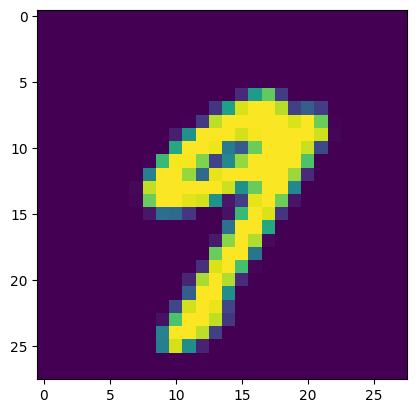

In [114]:
plt.imshow(x_simple)

In [115]:
xs, ys = test_ds[0:100]

In [116]:
xs.shape

torch.Size([100, 28, 28])

In [117]:
ys.shape

torch.Size([100, 10])

In [118]:
yhats = f(xs).argmax(axis=1)

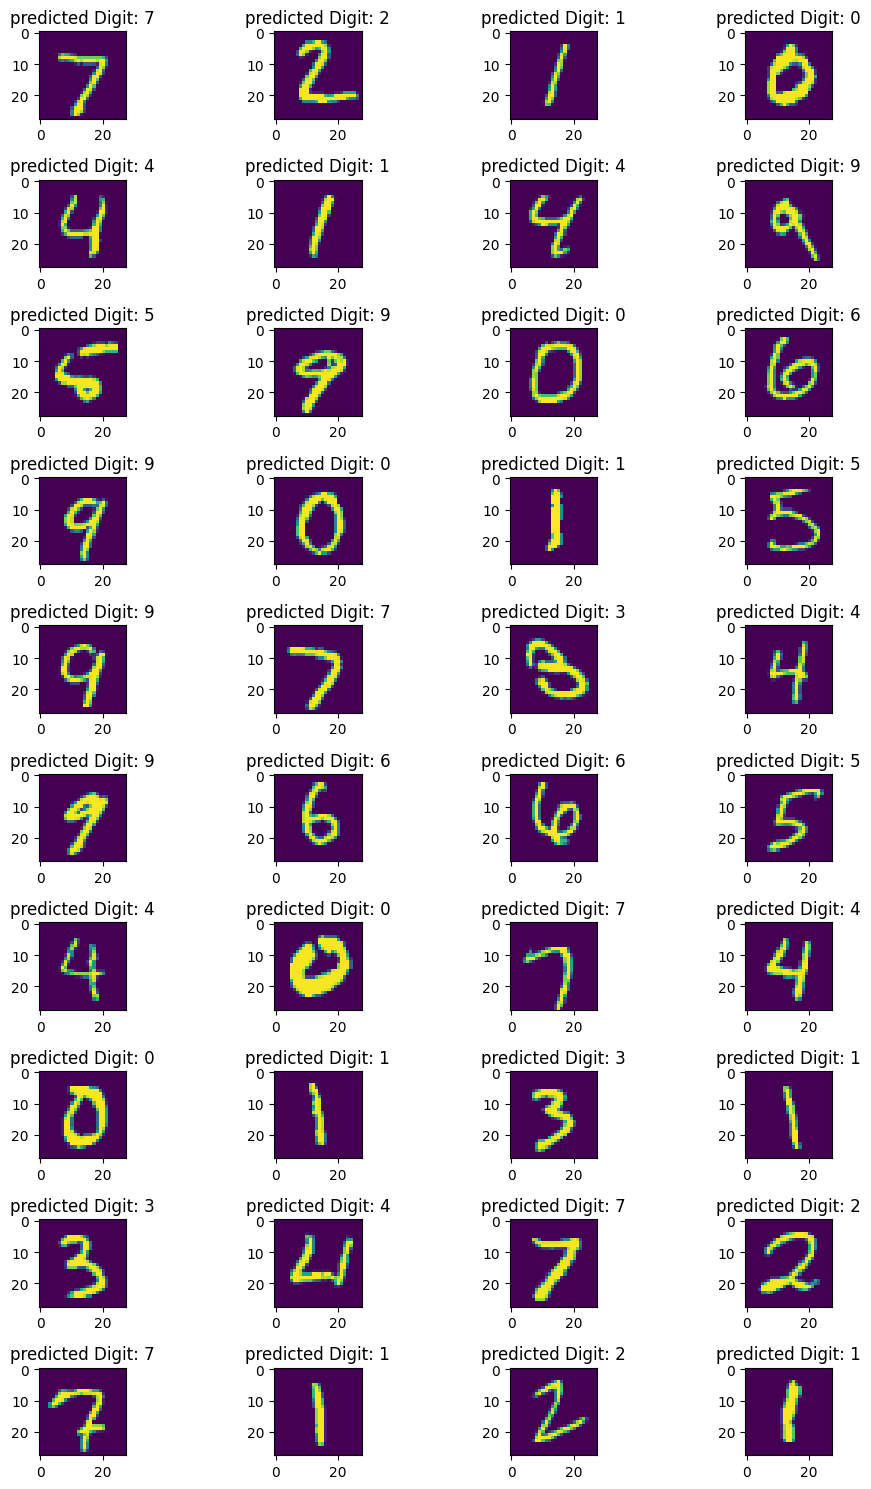

In [119]:
fig, ax = plt.subplots(10, 4, figsize=(10, 15))
for i in range(40):
    plt.subplot(10, 4, i+1)
    plt.imshow(xs[i])
    plt.title(f"predicted Digit: {yhats[i]}")

fig.tight_layout()
plt.show()